<a href="https://colab.research.google.com/github/ejmarinc/TallerCienciaDeDatos/blob/main/UNED__Clase1_Preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNIVERSIDAD ESTATAL A DISTANCIA**
TALLER INTRODUCCION A CIENCIA DE DATOS

**SESION #1**

# Preprocesamiento de datos - Caso TITANIC

In [2]:
import numpy as np
import pandas as pd

In [42]:
 data =  pd.read_csv('https://raw.githubusercontent.com/ejmarinc/TallerCienciaDeDatos/main/heart.csv')

In [43]:
data.shape

(303, 14)

In [45]:
data.head(14)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Podemos seleccionar el arreglo de columas que sean de nuestro interés:

In [46]:
cols_to_use = ['age', 'sex', 'cp','trestbps','chol','thalach']

In [47]:
data = data[cols_to_use]

In [48]:
data.head(10)

,age,sex,cp,trestbps,chol,thalach
0,63,1,3,145,233,150
1,37,1,2,130,250,187
2,41,0,1,130,204,172
3,56,1,1,120,236,178
4,57,0,0,120,354,163
5,57,1,0,140,192,148
6,56,0,1,140,294,153
7,44,1,1,120,263,173
8,52,1,2,172,199,162
9,57,1,2,150,168,174


Validamos la existencia de NaN:

In [49]:
data.isnull().values.any()

False

Validamos el tamaño original del dataset:

In [50]:
data.shape

(303, 6)

Decidimos eliminar cualquier instancia que contenga al menos, un NaN:

In [51]:
data = data.dropna()

y verificamos el tamaño final del dataset:

In [52]:
data.shape

(303, 6)

Notamos como 177 instancias fueron eliminadas.

# ¿Qué sigue? Debemos de verificar si hay alguna variable categórica, de existir debemos de binarizarla:

In [12]:
data['Sex'] = data['Sex'].replace({'male' : 0, 'female' : 1})

In [54]:
data.head(10)

,age,sex,cp,trestbps,chol,thalach
0,63,1,3,145,233,150
1,37,1,2,130,250,187
2,41,0,1,130,204,172
3,56,1,1,120,236,178
4,57,0,0,120,354,163
5,57,1,0,140,192,148
6,56,0,1,140,294,153
7,44,1,1,120,263,173
8,52,1,2,172,199,162
9,57,1,2,150,168,174


Finalmente como etapa previa a los algoritmos de aprendizaje, partimos nuestro dataset en *training* y *testing*:

In [53]:
from sklearn.model_selection import train_test_split

Creamos nuestro conjunto de features (X) y labels (y):

In [55]:
features = data[['sex','age','trestbps','chol','thalach']]
labels = data['cp']

In [56]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, random_state = 13)

In [57]:
data.shape

(303, 6)

In [58]:
X_train.shape

(227, 5)

In [59]:
y_test.shape

(76,)

Nótese como por defecto el tamaño de *training* es del 75% (535/714) y *testing* del 25% (179/714), si deseamos una partición distinta, por ejemplo 80% *training* y 20% *testing*, lo hacemos de la siguiente manera:

In [60]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state = 13) 

In [61]:
X_train.shape

(242, 5)

Efectivamente ahora 571 corresponde al 80% de 714.

### Truco: (en PANDAS 0.25)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/fmezacr/DataScienceTEC/master/Clase2/pima-indians-diabetes.csv')

In [ ]:
dataset.columns = ['Preg','Gluc','BP','SkinT','Insulin','BMI','DPF','Age','Outcome']

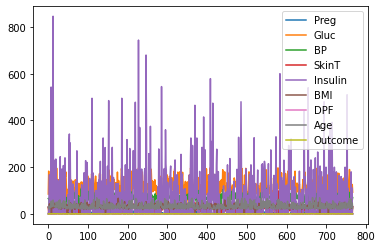

In [ ]:
dataset.plot()

(10.0, 20.0)

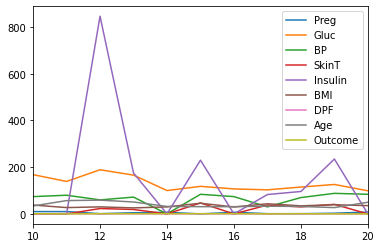

In [ ]:
dataset.plot()
plt.xlim(10,20)

(10.0, 30.0)

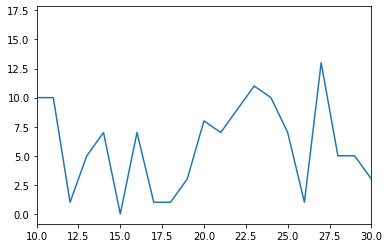

In [ ]:
dataset['Preg'].plot()
plt.xlim(10,30)

(10.0, 30.0)

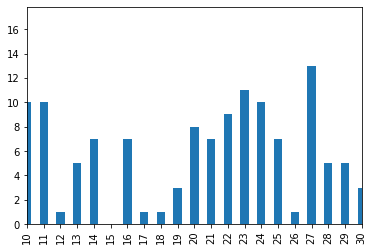

In [ ]:
dataset['Preg'].plot.bar()
plt.xlim(10,30)

CORRELACION DE DATOS GRAFICA

In [63]:
import seaborn as sns

In [64]:
data.corr()

,age,sex,cp,trestbps,chol,thalach
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,-0.398522
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,-0.044020
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.295762
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,-0.046698
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,-0.009940
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,1.000000


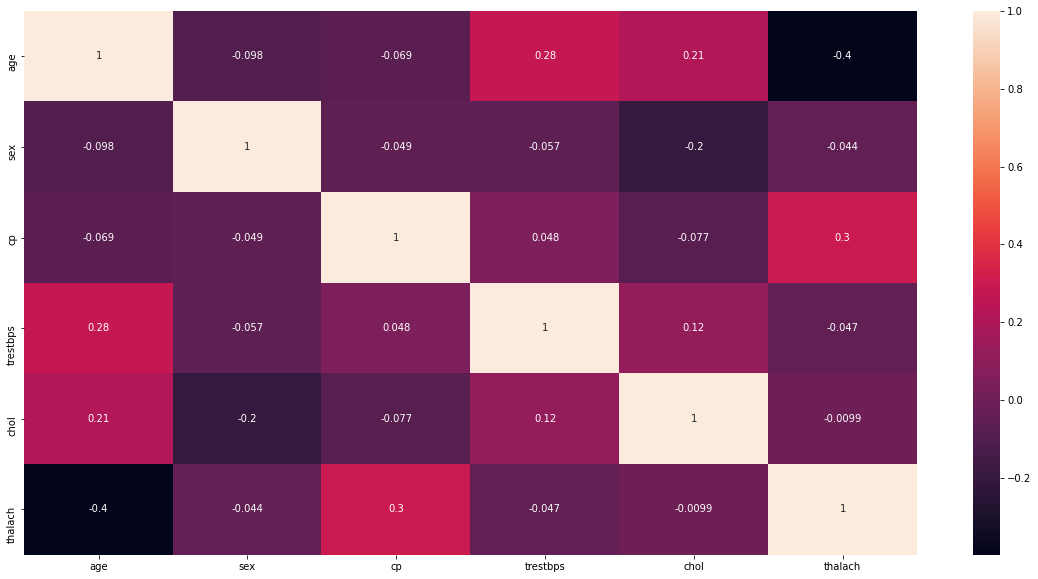

In [65]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)